<a href="https://www.kaggle.com/mobe333/dyno-validation?scriptVersionId=85817325" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analysis for Validating Dyno as an End of Line Test Method

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import matplotlib.pyplot as plt
from math import sqrt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
#used the "random state" parameter from the test_train_split function so that everything models with the same training and test data split
seed = 324
testnumber = 5

In [2]:
df = pd.read_csv('../input/bs-data-4/BS Data.csv')

In [3]:
df

,Record,Serial,8410,8510,8310,8610,8900,8720,3010,3020,...,Poly Tire,Fork Length,36,48,96,144,Width,Intellispeed,Test Track Speed,Dyno Speed
0,1,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,6.2,6.8
1,2,NaN,0,0,0,1,0,0,0,0,...,NaN,96,0,0,1,0,NaN,0,8.1,8.9
2,3,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,1,6.1,7.0
3,4,NaN,1,0,0,0,0,0,0,0,...,NaN,144,0,0,0,1,NaN,0,8.0,8.9
4,5,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,7.1,8.0
5,6,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,8.2,8.9
6,7,NaN,1,0,0,0,0,0,0,0,...,NaN,36,1,0,0,0,NaN,0,6.2,7.0
7,8,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,8.0,8.9
8,9,NaN,0,0,0,0,0,1,0,0,...,NaN,48,0,1,0,0,NaN,0,8.0,8.8
9,10,NaN,0,0,1,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,8.0,8.7


I am trying to determine how well the speed reading off of the dyno predicts the speed reading on the test track so we use load dyno speed as our feature and test track speed as the target we are trying to predict.

In [4]:
features = ['Dyno Speed']
target = ['Test Track Speed']

In [5]:
X = df[features]
y = df[target]

In [6]:
print(X)
print(y)

    Dyno Speed
0          6.8
1          8.9
2          7.0
3          8.9
4          8.0
5          8.9
6          7.0
7          8.9
8          8.8
9          8.7
10         8.5
11         8.6
12         8.5
    Test Track Speed
0                6.2
1                8.1
2                6.1
3                8.0
4                7.1
5                8.2
6                6.2
7                8.0
8                8.0
9                8.0
10               7.9
11               7.8
12               7.8


Splitting our data into training data and testing data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testnumber, random_state=seed)

Fit the training data to the model.

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[7.8337234 ],
       [6.29159574],
       [8.12287234],
       [8.12287234],
       [8.12287234]])

In [10]:
ModelvsActual = y_test.copy().reset_index(drop=True)
ModelvsActual["Predicted Speed"] = y_prediction
ModelvsActual.round(decimals = 1)

,Test Track Speed,Predicted Speed
0,7.8,7.8
1,6.1,6.3
2,8.1,8.1
3,8.2,8.1
4,8.0,8.1


In [11]:
y_test

,Test Track Speed
11,7.8
2,6.1
1,8.1
5,8.2
3,8.0


In [12]:
y_test.describe()

,Test Track Speed
count,5.000000
mean,7.640000
std,0.873499
min,6.100000
25%,7.800000
50%,8.000000
75%,8.100000
max,8.200000


In [13]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

0.10900975116383214


Quantifying the goodness of fit.

In [14]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [15]:
sklearn.metrics.r2_score(y_test,y_prediction)

0.9805322315714275


RMSE =  0.10900975116383214


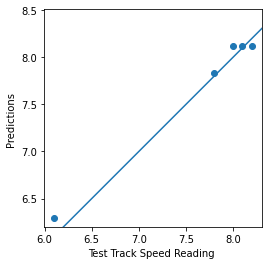

In [16]:
print('\nRMSE = ', RMSE)
plt.scatter(y_test, y_prediction)
plt.xlabel('Test Track Speed Reading ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([0, 10], [0, 10])

In [17]:
predicted_v_actual_df = y_test.copy().reset_index(drop = True)
predicted_v_actual_df['Predicted Test Track Speed'] = y_prediction
predicted_v_actual_df.round(decimals = 1)

,Test Track Speed,Predicted Test Track Speed
0,7.8,7.8
1,6.1,6.3
2,8.1,8.1
3,8.2,8.1
4,8.0,8.1


# Run Again Adding Fork Length as a Predictor
## Fork Length as Continuous Variable


RMSE =  0.6766678365736792


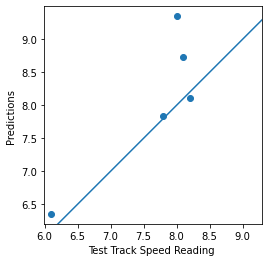

In [18]:
features = ['Dyno Speed','Fork Length']
target = ["Test Track Speed"]
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testnumber, random_state=seed)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
y_prediction
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('\nRMSE = ', RMSE)
#print('\nr2 Score = ', sklearn.metrics.r2_score(y_test,y_prediction),'\n')
#sklearn.metrics.r2_score(y_test,y_prediction)
plt.scatter(y_test, y_prediction)
plt.xlabel('Test Track Speed Reading ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([0, 10], [0, 10])

In [19]:
predicted_v_actual_df = y_test.copy().reset_index(drop = True)
predicted_v_actual_df['Predicted Test Track Speed'] = y_prediction
predicted_v_actual_df.round(decimals = 1)

,Test Track Speed,Predicted Test Track Speed
0,7.8,7.8
1,6.1,6.4
2,8.1,8.7
3,8.2,8.1
4,8.0,9.3


# Run Again Adding Fork Length as a Predictor
## Fork Length as Discrete Variable


RMSE =  0.6766678365736792


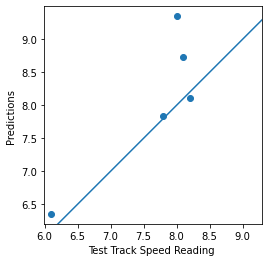

In [20]:
#add fork length discrete variables to the dataframe here
#features = ['Dyno Speed','Fork Length']
target = ["Test Track Speed"]
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testnumber, random_state=seed)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
y_prediction
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('\nRMSE = ', RMSE)
#print('\nr2 Score = ', sklearn.metrics.r2_score(y_test,y_prediction),'\n')
#sklearn.metrics.r2_score(y_test,y_prediction)
plt.scatter(y_test, y_prediction)
plt.xlabel('Test Track Speed Reading ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([0, 10], [0, 10])

In [21]:
predicted_v_actual_df = y_test.copy().reset_index(drop = True)
predicted_v_actual_df['Predicted Test Track Speed'] = y_prediction
predicted_v_actual_df.round(decimals = 1)

,Test Track Speed,Predicted Test Track Speed
0,7.8,7.8
1,6.1,6.4
2,8.1,8.7
3,8.2,8.1
4,8.0,9.3


# Add Model as Predictor


RMSE =  0.11496028036004569


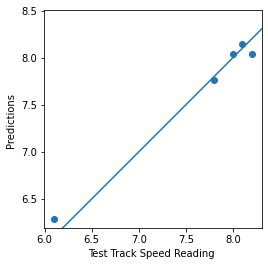

In [22]:
features = ['Dyno Speed','8410','8510','8310','8610','8900','8720','3010','3020','3030']
target = ["Test Track Speed"]
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testnumber, random_state=seed)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
y_prediction
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('\nRMSE = ', RMSE)
#print('\nr2 Score = ', sklearn.metrics.r2_score(y_test,y_prediction),'\n')
#sklearn.metrics.r2_score(y_test,y_prediction)
plt.scatter(y_test, y_prediction)
plt.xlabel('Test Track Speed Reading ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([0, 10], [0, 10])

In [23]:
predicted_v_actual_df = y_test.copy().reset_index(drop = True)
predicted_v_actual_df['Predicted Test Track Speed'] = y_prediction
predicted_v_actual_df.round(decimals = 1)

,Test Track Speed,Predicted Test Track Speed
0,7.8,7.8
1,6.1,6.3
2,8.1,8.1
3,8.2,8.0
4,8.0,8.0


# DO ONE FOR ALL IN

# The Models Below are Not Splitting into Test and Training Set


RMSE =  0.10451748125681118

r2 Score =  0.9815312149147932 



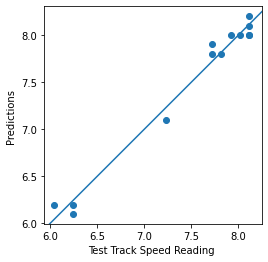

In [24]:
features = ['Dyno Speed']
target = ["Test Track Speed"]
X = df[features]
y = df[target]
regressor = LinearRegression()
regressor.fit(X, y)
y_prediction = regressor.predict(X)
RMSE = sqrt(mean_squared_error(y_true = y, y_pred = y_prediction))
print('\nRMSE = ', RMSE)
print('\nr2 Score = ', sklearn.metrics.r2_score(y,y_prediction),'\n')
plt.scatter(y_prediction, y)
plt.xlabel('Test Track Speed Reading ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([0, 10], [0, 10])

In [25]:
predicted_v_actual_df = y.copy().reset_index(drop = True)
predicted_v_actual_df['Predicted Speed'] = y_prediction
predicted_v_actual_df.round(decimals = 1)

,Test Track Speed,Predicted Speed
0,6.2,6.0
1,8.1,8.1
2,6.1,6.2
3,8.0,8.1
4,7.1,7.2
5,8.2,8.1
6,6.2,6.2
7,8.0,8.1
8,8.0,8.0
9,8.0,7.9


### Adding fork length as discrete variable to see if it improves model

In [26]:
df

,Record,Serial,8410,8510,8310,8610,8900,8720,3010,3020,...,Poly Tire,Fork Length,36,48,96,144,Width,Intellispeed,Test Track Speed,Dyno Speed
0,1,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,6.2,6.8
1,2,NaN,0,0,0,1,0,0,0,0,...,NaN,96,0,0,1,0,NaN,0,8.1,8.9
2,3,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,1,6.1,7.0
3,4,NaN,1,0,0,0,0,0,0,0,...,NaN,144,0,0,0,1,NaN,0,8.0,8.9
4,5,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,7.1,8.0
5,6,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,8.2,8.9
6,7,NaN,1,0,0,0,0,0,0,0,...,NaN,36,1,0,0,0,NaN,0,6.2,7.0
7,8,NaN,1,0,0,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,8.0,8.9
8,9,NaN,0,0,0,0,0,1,0,0,...,NaN,48,0,1,0,0,NaN,0,8.0,8.8
9,10,NaN,0,0,1,0,0,0,0,0,...,NaN,48,0,1,0,0,NaN,0,8.0,8.7



RMSE =  0.09760700608309633

r2 Score =  0.983892711378857 



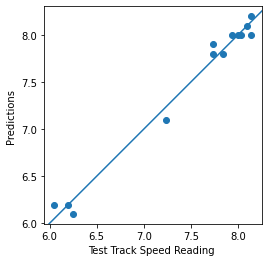

In [27]:
features = ['Dyno Speed','36','48','96','144']
target = ["Test Track Speed"]
X = df[features]
y = df[target]
regressor = LinearRegression()
regressor.fit(X, y)
y_prediction = regressor.predict(X)
RMSE = sqrt(mean_squared_error(y_true = y, y_pred = y_prediction))
print('\nRMSE = ', RMSE)
print('\nr2 Score = ', sklearn.metrics.r2_score(y,y_prediction),'\n')
plt.scatter(y_prediction, y)
plt.xlabel('Test Track Speed Reading ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([0, 10], [0, 10])

In [28]:
predicted_v_actual_df = y.copy().reset_index(drop = True)
predicted_v_actual_df['Predicted Test Track Speed'] = y_prediction
predicted_v_actual_df.round(decimals = 1)

,Test Track Speed,Predicted Test Track Speed
0,6.2,6.0
1,8.1,8.1
2,6.1,6.2
3,8.0,8.0
4,7.1,7.2
5,8.2,8.1
6,6.2,6.2
7,8.0,8.1
8,8.0,8.0
9,8.0,7.9
